In [2]:
import pandas as pd
import numpy as np
import scipy.sparse as ss
import gc
from Centrality import *
import pickle

%load_ext autoreload
%autoreload 2

In [230]:
df = pd.read_pickle('DATA/light_data.pkl')
df

,user_id,page_id,week_start_date,reaction_time
5015383,502548149224,5550296508,2016-07-31,0
5015396,502548149224,6491828674,2016-07-31,0
5015409,502548149224,7938522410,2016-07-31,0
5015422,502548149224,9124187907,2016-07-31,0
5015431,502548149224,10513336322,2016-07-31,0
...,...,...,...,...
25543526,10212036602018169,31732483895,2016-10-30,0
25543538,10212036602018169,131929868907,2016-10-30,0
25543550,10212036602018169,114528955231791,2016-10-30,0
25543560,10212036602018169,354522044588660,2016-10-30,0


In [3]:
network_column_name = ['user_id', 'page_id', 'reaction_time']



In [5]:
weeks = sorted(df.week_start_date.unique())

week_1 = df[df.week_start_date == weeks[0]]

In [40]:
# for week in weeks:
#     week_string = str(week)[:10]

#     print(f'Processing {week_string}')
#     CG = Centrality(df[df.week_start_date == week ][network_column_name])

#     _, unweighted_eigenvector_centrality = CG.eigenvector_centrality_unweighted
#     df_centrality = pd.DataFrame(list(unweighted_eigenvector_centrality.items()), columns=["page_id", 'unweighted_eigenvector_centrality'])
#     # read csv
#     dft  = pandas.read_csv(f'Result/{week_string}_centrality.csv', index_col=0)
#     dft = dft.merge(df_centrality, on='page_id', how='left')

#     dft.to_csv(f'Result/{week_string}_centrality.csv', index = False)
#     print('='*30)

Processing 2016-07-31
Graph created
Creating edges...
Graph creation completed successfully


/Users/abc/Desktop/110-2/RA/Social Nerwork/Centrality.py:62: FutureWarning: biadjacency_matrix will return a scipy.sparse array instead of a matrix in NetworkX 3.0
  return nx.bipartite.biadjacency_matrix(


Calculating pages' eigenvector centrality
Calulating user's eigenvector centrality
Processing 2016-08-07
Graph created
Creating edges...
Graph creation completed successfully
Calculating pages' eigenvector centrality
Calulating user's eigenvector centrality
Processing 2016-08-14
Graph created
Creating edges...
Graph creation completed successfully
Calculating pages' eigenvector centrality
Calulating user's eigenvector centrality
Processing 2016-08-21
Graph created
Creating edges...
Graph creation completed successfully
Calculating pages' eigenvector centrality
Calulating user's eigenvector centrality
Processing 2016-08-28
Graph created
Creating edges...
Graph creation completed successfully
Calculating pages' eigenvector centrality
Calulating user's eigenvector centrality
Processing 2016-09-04
Graph created
Creating edges...
Graph creation completed successfully
Calculating pages' eigenvector centrality
Calulating user's eigenvector centrality
Processing 2016-09-11
Graph created
Creati

In [4]:
CG = Centrality(week_1)
dc = CG.degree_centrality

Graph created
Creating edges...
Graph creation completed successfully


In [6]:
import requests as rq
from bs4 import BeautifulSoup as bs

second_batch = set(topn(CG.page_centrality(dc), 200).keys()) - set(topn(CG.page_centrality(dc), 100).keys()) 


page_name = dict()
for id in second_batch:
    print("id = \t", id)
    html = rq.get(f'http://www.facebook.com/{id}').text
    bs_obj = bs(html)
    name = bs_obj.find('meta', property="og:title")['content']
    page_name[id] = name
    print(name, '\n')


id = 	 10606591490
TIME 

id = 	 10513336322
The Guardian 

id = 	 9258148868
The New Yorker 

id = 	 42354254341
ABC13 Houston 

id = 	 18943096862
Lizzy the Lezzy 

id = 	 217940775059524
Addicted 2 Country Music 

id = 	 31160214090
ABC7NY 

id = 	 273863336077899
登入或註冊即可查看 

id = 	 143666524748
The Telegraph 

id = 	 532854420074062
Faves USA 

id = 	 232843448409
Ezra Klein 

id = 	 131247023568988
Proud Liberal Americans 

id = 	 304981108326
Coffee Party USA 

id = 	 18807449704
Mashable 

id = 	 131929868907
Collective Evolution 

id = 	 18356341358
ABC15 Arizona 

id = 	 89033370735
E! News 

id = 	 6363207806
CollegeHumor 

id = 	 62317591679
POLITICO 

id = 	 112779115408517
KIRO 7 News 

id = 	 200137333331078
登入或註冊即可查看 

id = 	 150354326163
Proud to be an American 

id = 	 52150999700
Entertainment Weekly 

id = 	 451075468389015
Donald Trump Is My President 

id = 	 8719774366
Complex 

id = 	 156720204453023
登入或註冊即可查看 

id = 	 131201286936061
Franklin Graham 

id = 	 468

In [37]:
name_df = pd.DataFrame(list(page_name.items()), columns=['page_id', 'page_name'])
name_df

,page_id,page_name
0,10606591490,TIME
1,10513336322,The Guardian
2,9258148868,The New Yorker
3,42354254341,ABC13 Houston
4,18943096862,Lizzy the Lezzy
...,...,...
95,115099421882868,登入或註冊即可查看
96,21516776437,Slate.com
97,20446254070,Business Insider
98,618786471475708,BuzzFeed News


In [38]:
name_df.loc[name_df.page_name == "登入或註冊即可查看",'page_name'] = 'Unknown Page Name '
name_df

,page_id,page_name
0,10606591490,TIME
1,10513336322,The Guardian
2,9258148868,The New Yorker
3,42354254341,ABC13 Houston
4,18943096862,Lizzy the Lezzy
...,...,...
95,115099421882868,Unknown Page Name
96,21516776437,Slate.com
97,20446254070,Business Insider
98,618786471475708,BuzzFeed News


In [41]:
# append with old one
page_name_map = pd.read_csv('page_name_map.csv', index_col=0)
add_new_map = page_name_map.append(name_df, ignore_index = True)

add_new_map.loc[add_new_map.page_name.str.contains('Unknown'), 'page_name'] = 'Unknown Page Name'

add_new_map

,page_id,page_name
0,15704546335,Fox News
1,153080620724,Donald J. Trump
2,346937065399354,Occupy Democrats
3,18468761129,HuffPost
4,205344452828349,George Takei
...,...,...
195,115099421882868,Unknown Page Name
196,21516776437,Slate.com
197,20446254070,Business Insider
198,618786471475708,BuzzFeed News


In [42]:

s = add_new_map.groupby(['page_name']).cumcount()
add_new_map['page_name'] = (add_new_map['page_name'] + s[s>0].astype(str)).fillna(add_new_map['page_name'])


In [43]:
add_new_map

,page_id,page_name
0,15704546335,Fox News
1,153080620724,Donald J. Trump
2,346937065399354,Occupy Democrats
3,18468761129,HuffPost
4,205344452828349,George Takei
...,...,...
195,115099421882868,Unknown Page Name24
196,21516776437,Slate.com
197,20446254070,Business Insider
198,618786471475708,BuzzFeed News


In [45]:
add_new_map.to_csv('page_name_map.csv')

In [60]:
import pickle
with open(f"community_detection.pkl",'wb') as f:
    pickle.dump(CG.community_detection, f)


/Users/abc/Desktop/110-2/RA/Social Nerwork/Centrality.py:63: FutureWarning: biadjacency_matrix will return a scipy.sparse array instead of a matrix in NetworkX 3.0
  self.G, row_order=self.user_node, column_order=self.page_node)


In [12]:
import pickle
import pandas as pd

In [13]:
page_name_df = pd.read_csv('DATA/page_ideology.csv')
page_name = {u:v for u, v in zip(page_name_df.page_id, page_name_df.page_name)}

In [ ]:
week_string = '2016-08-14'

with open(f"Result/with_politicians/{week_string}_community_detection.pkl", "rb") as f:
    community = pickle.load(f)
i=1
for sets in community:
    print("layer", i)
    i+=1
    new_list = []
    for s in list(sets):
        try:
            if 'Unknown Page Name ' in page_name[s]:
                raise("")
            new_list.append(page_name[s])
        except:
            continue
    print(new_list)
    print("="*30)
            
    

In [ ]:
week_string = '2016-10-30'

with open(f"Result/{week_string}_community_detection.pkl", "rb") as f:
    community = pickle.load(f)
i=1
for sets in community:
    print("layer", i)
    i+=1
    new_list = []
    for s in list(sets):
        try:
            if 'Unknown Page Name ' in page_name[s]:
                raise("")
            new_list.append(page_name[s])
        except:
            continue
    print(new_list)
    print("="*30)
            
    

# Average Centrality According to Detected Community

## Constructing the class

In [3]:
import pickle
from dataclasses import dataclass
from typing import Dict

@dataclass
class CommunityStat:
    week: str
    trump_community:list
    clinton_community:list
    johnson_community:list
    other_community:list

    def filter_by_centrality(self, centrality_list):

        """
        In case you don't want all pages to be included in, pass in the centrality list that you want to filter.
        """
    
        self.trump_community = [id for id in self.trump_community if id in centrality_list]
        self.clinton_community = [id for id in self.clinton_community if id in centrality_list]
        self.johnson_community = [id for id in self.johnson_community if id in centrality_list]

        self.other_community = [id for id in self.other_community if id in centrality_list]
        return self
    
    @property
    def dict(self):
        self.__dict = dict()
        self.__dict.update({t:1 for t in self.trump_community})
        self.__dict.update({c:2 for c in self.clinton_community})
        self.__dict.update({j:3 for j in self.johnson_community})
        self.__dict.update({o:0 for o in self.other_community})

        return self.__dict

    def average_centrality(self, week_centrality:Dict):
        """
            week_centrality : {
                182739503862  : 0.73,
                9672727986293 : 0.23,...
            }
        """
        import numpy as np
        trump_centrality = np.mean([week_centrality[id] for id in self.trump_community ])
        clinton_centrality = np.mean([week_centrality[id] for id in self.clinton_community ])
        other_centrality = np.mean([week_centrality[id] for id in self.other_community ])

        return (trump_centrality, clinton_centrality, other_centrality)


## Read name map from the scraping result

Update: The page_id <--> page_name map is actually included in the original data before lightening them.

In [4]:
from typing import List
import pandas as pd


all_centrality = pd.read_csv('Full_centrality.csv', index_col=0)
weeks = sorted(all_centrality.week.unique())
    
community_week_change:List[CommunityStat] = []

trump_page_id = 153080620724
clinton_page_id = 889307941125736
johnson_page_id = 165297924363

import pandas as pd
page_with_names = pd.read_csv("DATA/page_ideology.csv")
filter_list = list(page_with_names.page_id)


## CommunityStat instance creation

In [5]:

for week in weeks:
    week_string = str(week)[:10]

    # load community in week
    with open(f"Result/with_politicians/{week_string}_community_detection.pkl", 'rb') as f:
        community = pickle.load(file = f)

    trump_community = []
    clinton_community = []
    johnson_community = []
    other = []

    for i, layer in enumerate(community):
        # find Trump
        if trump_page_id in layer:
            trump_community = list(layer)
            continue

        if clinton_page_id in layer:
            clinton_community = list(layer)
            continue

        if johnson_page_id in layer:
            johnson_community = list(layer)
            continue

        other += layer
    
    community_week_change.append(
        CommunityStat(
            week_string,
            trump_community,
            clinton_community,
            johnson_community, 
            other).filter_by_centrality(filter_list)
        )

    
    

In [ ]:
community_week_change

In [6]:
import pandas as pd
pn_df = pd.read_csv("DATA/page_ideology.csv", index_col=0)

community_df = pd.DataFrame()

c:CommunityStat

## change to week value
for i, c in enumerate(community_week_change):
    # n = len()

    temp_df = pd.DataFrame({
        'page_id':list(c.dict.keys()),
        'week': [weeks[i]]*len(c.dict),
        'community': list(c.dict.values())
        })
    community_df = pd.concat([community_df, temp_df], ignore_index=True)

In [56]:
community_week_change = pn_df.join(community_df.set_index('page_id'), on='page_id')

rename_list = "Other Trump Clinton Johnson".split()

community_week_change = (
    pd
    .get_dummies(
        community_week_change, 
        prefix='Community', columns=['community'])
    .rename(
        columns={'Community_'+str(i): name 
        for i, name in enumerate(rename_list)}
        )
    )
# community_week_change_top_200.to_csv("Result/with_politicians/community_aggregation/community_week_change.csv")
community_week_change.to_csv("Result/with_politicians/community_aggregation/community_week_change.csv")

In [23]:
community_week_change = pd.read_csv("Result/with_politicians/community_aggregation/community_week_change.csv", index_col = 0)
page_ideology_from_avg_community = community_week_change.groupby('page_id').mean().reset_index().merge(pn_df[['page_id', 'page_name']], how='left')
page_ideology_from_avg_community

,page_id,page_ideo_full_year,Other,Trump,Clinton,Johnson,page_name
0,5281959998,-0.366761,0.000000,0.000000,1.000000,0.000000,The New York Times
1,5550296508,-0.190887,0.000000,0.000000,1.000000,0.000000,CNN
2,5633824547,1.137886,0.000000,1.000000,0.000000,0.000000,FreedomWorks
3,5637143257,-0.515393,0.000000,0.000000,1.000000,0.000000,The Boston Globe
4,5718758966,-0.398738,0.000000,0.000000,1.000000,0.000000,Gizmodo
...,...,...,...,...,...,...,...
940,997108126967413,-0.062233,0.571429,0.000000,0.071429,0.357143,Anonymous
941,1425604894326440,-0.117302,0.357143,0.000000,0.142857,0.500000,The Free Thought Project
942,1439042583002670,-0.408474,0.000000,0.000000,1.000000,0.000000,ClickHole
943,1565918810345070,-1.093082,0.000000,0.000000,1.000000,0.000000,Lucid Nation


In [27]:
## create ideology_type from community detection
page_ideology_from_avg_community['ideology_from_community'] = page_ideology_from_avg_community[['Other','Trump','Clinton','Johnson']].idxmax(axis = 1)


In [28]:
page_ideology_from_avg_community

,page_id,page_ideo_full_year,Other,Trump,Clinton,Johnson,page_name,ideology_from_community
0,5281959998,-0.366761,0.000000,0.000000,1.000000,0.000000,The New York Times,Clinton
1,5550296508,-0.190887,0.000000,0.000000,1.000000,0.000000,CNN,Clinton
2,5633824547,1.137886,0.000000,1.000000,0.000000,0.000000,FreedomWorks,Trump
3,5637143257,-0.515393,0.000000,0.000000,1.000000,0.000000,The Boston Globe,Clinton
4,5718758966,-0.398738,0.000000,0.000000,1.000000,0.000000,Gizmodo,Clinton
...,...,...,...,...,...,...,...,...
940,997108126967413,-0.062233,0.571429,0.000000,0.071429,0.357143,Anonymous,Other
941,1425604894326440,-0.117302,0.357143,0.000000,0.142857,0.500000,The Free Thought Project,Johnson
942,1439042583002670,-0.408474,0.000000,0.000000,1.000000,0.000000,ClickHole,Clinton
943,1565918810345070,-1.093082,0.000000,0.000000,1.000000,0.000000,Lucid Nation,Clinton


In [29]:
page_ideology_from_avg_community.to_csv('Result/with_politicians/community_aggregation/page_ideology_from_avg_community.csv')

In [69]:
## average centrality within each community
for i, week in enumerate(weeks):
    week_str = str(week)[:10]
    this_week_df = all_centrality[all_centrality.week == week]
    centrality_dict = {j: c for j, c  in 
    zip(this_week_df.page_id, this_week_df['unweighted_eigenvector_centrality'])}
    print(community_week_change[i].average_centrality(centrality_dict))
    

(0.11216560197624781, 0.026679093910129563, 0.02250007696350244)
(0.10529987486318572, 0.04155729855463819, 0.03597220987658702)
(0.11553947510494478, 0.022602153928490337, 0.024501449275950053)
(0.11310017688925228, 0.018655549714815492, 0.024607311613995597)
(0.11469909347493719, 0.02368247006480946, 0.030089238692703586)
(0.10247471304400042, 0.020333529876983714, 0.027937463326841053)
(0.10866993612527026, 0.029988938404957404, 0.027007213903074655)
(0.10066317735370571, 0.05055265400665595, 0.028517662969647625)
(0.05286671438816748, 0.09946288284620335, 0.036543698753082166)
(0.10431296711084843, 0.03323434853096851, 0.02334198252669586)
(0.10753714095524534, 0.024792362868078854, 0.017948275674342054)
(0.10620700607970873, 0.0316162069182117, 0.026942428140699592)
(0.1071611588272276, 0.018705444638010497, 0.02251224606712378)
(0.10794619079968162, 0.021187321511606193, 0.020791753937599886)


# Preprocessing for panel data regression

In [34]:
all_page_info = pd.read_csv('DATA/1000-page-info.csv')
week_ideology_info = pd.read_csv('Result/with_politicians/community_aggregation/community_week_change.csv')

agg_ideology_info = pd.read_csv('Result/with_politicians/community_aggregation/page_ideology_from_avg_community.csv')

# the original data contains fake_post_count, while the lighr pkl data loaded in the secon cell does not contain this column.
user_interaction_df = pd.read_csv('DATA/user_page_week_likes_201608_201611_add_quality_100000_sample.csv')


fake_post_df = user_interaction_df.groupby(['page_id','week_start_date'])[['fake_posts_count']].first().reset_index()
fake_post_df['fake_posts_cum'] =  fake_post_df.groupby(['page_id'])['fake_posts_count'].cumsum(axis=0)


full_centrality_all_df = pd.read_csv('Full_centrality.csv', index_col=0)

page_info_filter_column = ['page_id','page_name','category', 'type', 'type_sub','fan_count','talking_about_count','total_like','total_comment', 'total_share']
ideology_info_filter_column = ['page_id','page_ideo_full_year', 'week', 'Other', 'Trump','Clinton','Johnson']
agg_ideology_info_filter_column = ['page_id', 'ideology_from_community']

df_to_dta = (fake_post_df
            # combine with centrality result
            .merge(full_centrality_all_df, how='left', 
                left_on=['page_id','week_start_date'],
                right_on=['page_id', 'week']).drop(['week_start_date'], axis=1)
            .dropna()
            # combine with page info
            .merge(all_page_info[page_info_filter_column], how='left',
                left_on=['page_id'],
                right_on=['page_id'])
            # combine with ideology created from average community membership
            .merge(agg_ideology_info[agg_ideology_info_filter_column], how = 'left', 
                left_on=['page_id'],
                right_on=['page_id'])
            # combine with ideology info
            .merge(week_ideology_info[ideology_info_filter_column], how='left',
                left_on=['page_id', 'week'],
                right_on=['page_id', 'week'])
)
df_to_dta

,page_id,fake_posts_count,fake_posts_cum,degree_centrality,eigenvector_centrality,closeness_centrality,unweighted_eigenvector_centrality,week,page_name,category,...,talking_about_count,total_like,total_comment,total_share,ideology_from_community,page_ideo_full_year,Other,Trump,Clinton,Johnson
0,5281959998,0.0,0.0,0.03649,0.002696,0.346152,0.051530,2016-07-31,The New York Times,Media/News/Publishing,...,1196413.0,529705.0,101940.0,133194.0,Clinton,-0.366761,0.0,0.0,1.0,0.0
1,5281959998,0.0,0.0,0.04338,0.008039,0.349067,0.092492,2016-08-07,The New York Times,Media/News/Publishing,...,1196413.0,529705.0,101940.0,133194.0,Clinton,-0.366761,0.0,0.0,1.0,0.0
2,5281959998,0.0,0.0,0.01790,0.002108,0.340725,0.022078,2016-08-14,The New York Times,Media/News/Publishing,...,1196413.0,529705.0,101940.0,133194.0,Clinton,-0.366761,0.0,0.0,1.0,0.0
3,5281959998,0.0,0.0,0.01571,0.001636,0.339154,0.015085,2016-08-21,The New York Times,Media/News/Publishing,...,1196413.0,529705.0,101940.0,133194.0,Clinton,-0.366761,0.0,0.0,1.0,0.0
4,5281959998,0.0,0.0,0.01694,0.001855,0.340341,0.020859,2016-08-28,The New York Times,Media/News/Publishing,...,1196413.0,529705.0,101940.0,133194.0,Clinton,-0.366761,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13115,1595723550651430,5.0,19.0,0.00027,0.000005,0.252853,0.001374,2016-10-02,Free Patriot Post,Media/News/Publishing,...,12088.0,3088.0,1957.0,2125.0,Trump,1.799179,0.0,1.0,0.0,0.0
13116,1595723550651430,12.0,31.0,0.00047,0.000005,0.272375,0.002209,2016-10-09,Free Patriot Post,Media/News/Publishing,...,12088.0,3088.0,1957.0,2125.0,Trump,1.799179,0.0,1.0,0.0,0.0
13117,1595723550651430,2.0,33.0,0.00044,0.000601,0.265873,0.002701,2016-10-16,Free Patriot Post,Media/News/Publishing,...,12088.0,3088.0,1957.0,2125.0,Trump,1.799179,0.0,1.0,0.0,0.0
13118,1595723550651430,3.0,36.0,0.00037,0.002038,0.284550,0.002399,2016-10-23,Free Patriot Post,Media/News/Publishing,...,12088.0,3088.0,1957.0,2125.0,Trump,1.799179,0.0,1.0,0.0,0.0


In [36]:
if True:
    # export to stata format
    df_to_dta.to_csv('Result/with_politicians/community_aggregation/page_centrality_with_info.csv')

# Remove political pages and recaluculate centrality

In [5]:
import pandas as pd

In [6]:
all_page_info = pd.read_csv('DATA/1000-page-and-politician-info.csv')
all_page_info

,page_id,page_name,type,type_sub,page_url,politician_name,party,chamber,state,district_rep,main_page,post_count
0,184179159166,Governor Robert Bentley,figure,politician,https://www.facebook.com/GovernorRobertBentley/,Robert J. Bentley,Republican,Governor,Alabama,Alabama,1.0,116.0
1,50850514797,Senator Richard Shelby,figure,politician,https://www.facebook.com/RichardShelby/,Richard Shelby,Republican,Senate,Alabama,Alabama,1.0,100.0
2,119152728153461,Ron Crumpton for U.S. Senate,figure,politician,https://www.facebook.com/Crumpton2016/,Ron Crumpton,Democratic,Senate,Alabama,Alabama,1.0,1.0
3,1374832002773140,U.S. Representative Bradley Byrne,figure,politician,https://www.facebook.com/RepByrne/,Bradley Byrne,Republican,House,Alabama,Alabama 1,0.0,NaN
4,113184250589,Bradley Byrne,figure,politician,https://www.facebook.com/byrneforalabama/,Bradley Byrne,Republican,House,Alabama,Alabama 1,1.0,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2461,737151126362683,American Military News,media,website,https://www.facebook.com/AmericanMilitaryNews,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2462,747754388695524,Bernie Sanders' Revolution,group,NaN,https://www.facebook.com/747754388695524,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2463,6181619439,The Denver Post,media,newspaper,https://www.facebook.com/denverpost,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2464,6879409364,Boston.com,media,website,https://www.facebook.com/boston,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print("All types: \t", all_page_info.type.unique())
print("All types: \t", all_page_info.type_sub.unique())

All types: 	 ['figure' 'media' 'group' 'others']
All types: 	 ['politician' 'tv' nan 'website' 'journalist' 'newspaper' 'magazine'
 'radio']


In [8]:
politician = all_page_info[all_page_info.type_sub == "politician"]
politician

,page_id,page_name,type,type_sub,page_url,politician_name,party,chamber,state,district_rep,main_page,post_count
0,184179159166,Governor Robert Bentley,figure,politician,https://www.facebook.com/GovernorRobertBentley/,Robert J. Bentley,Republican,Governor,Alabama,Alabama,1.0,116.0
1,50850514797,Senator Richard Shelby,figure,politician,https://www.facebook.com/RichardShelby/,Richard Shelby,Republican,Senate,Alabama,Alabama,1.0,100.0
2,119152728153461,Ron Crumpton for U.S. Senate,figure,politician,https://www.facebook.com/Crumpton2016/,Ron Crumpton,Democratic,Senate,Alabama,Alabama,1.0,1.0
3,1374832002773140,U.S. Representative Bradley Byrne,figure,politician,https://www.facebook.com/RepByrne/,Bradley Byrne,Republican,House,Alabama,Alabama 1,0.0,NaN
4,113184250589,Bradley Byrne,figure,politician,https://www.facebook.com/byrneforalabama/,Bradley Byrne,Republican,House,Alabama,Alabama 1,1.0,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2284,6593503709,Gabby Giffords,figure,politician,https://www.facebook.com/GGiffords,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2289,495539003867549,Brian Sims,figure,politician,https://www.facebook.com/brian.k.sims,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2298,128520090495170,Wayne Allyn Root,figure,politician,https://www.facebook.com/WayneAllynRoot,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2366,207116912648950,Reince Priebus,figure,politician,https://www.facebook.com/ReincePriebus,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
user_interaction_df = pd.read_csv('DATA/user_page_week_likes_201608_201611_add_quality_100000_sample.csv')


In [10]:

no_politicians_df = user_interaction_df[~(user_interaction_df.page_id.isin(politician.page_id))]
no_politicians_df = pd.merge(
    no_politicians_df, 
    all_page_info[['page_id', 'page_name']], 
    on=['page_id', 'page_id'], 
    
    how='left')

In [11]:
no_politicians_df

,user_id,page_id,week_start_date,week_end_date,reaction_time,is_politifact_user,fake_posts_count,page_name
0,10206453430271966,50978409031,2016-07-31,2016-08-06,12,False,0.0,azcentral
1,10205087534440418,254541051349349,2016-07-31,2016-08-06,23,True,0.0,My Favorite Gun
2,128151007607830,519305544814653,2016-07-31,2016-08-06,10,True,0.0,Conservative Tribune
3,424484791081996,89613772643,2016-07-31,2016-08-06,185,False,0.0,CNN en Español
4,765629276867242,197535293612901,2016-07-31,2016-08-06,32,False,0.0,UberFacts
...,...,...,...,...,...,...,...,...
4072744,10153174346808117,13312631635,2016-11-13,2016-11-19,9,False,0.0,The Independent
4072745,10202164588874255,26595441166,2016-11-20,2016-11-26,9,False,0.0,Media Matters for America
4072746,826349047450338,95926963131,2016-11-20,2016-11-26,9,False,0.0,People
4072747,818148344862558,21785951839,2016-11-27,2016-12-03,9,False,0.0,9GAG


## Create graph for each week like before

In [12]:
from Centrality import *
import os.path 
import sys

In [13]:
df = no_politicians_df
weeks = sorted(df.week_start_date.unique())

In [1]:
if False:
    save_result_dir = 'Result/without_politicians/'
    network_column_name = ['user_id', 'page_id', 'reaction_time']
    for week in weeks:
        csv_file_path = f"{save_result_dir}/{week}_centrality.csv"

        print(f'Processing {week}')
        CG = Centrality(df[df.week_start_date == week ][network_column_name])

        # degree_centrality
        dg_centrality = CG.degree_centrality
        dg_centrality = CG.page_centrality(dg_centrality)

        #eigenvetor_centrality_unweighted
        _, unweighted_eigenvector_centrality = CG.eigenvector_centrality_unweighted

        #eigenvector_centrality
        _, eigenvector_centrality = CG.eigenvector_centrality


        closeness_centrality = CG.closeness_centrality
        closeness_centrality = CG.page_centrality(closeness_centrality)
        
        new_df = pd.DataFrame(dg_centrality.items(), columns=['page_id', 'degree_centrality'])
        new_df['eigenvector_centrality'] = np.abs(new_df['page_id'].map(eigenvector_centrality))
        new_df['unweighted_eigenvector_centrality'] = np.abs(new_df['page_id'].map(unweighted_eigenvector_centrality))
        new_df['closeness_centrality'] = new_df['page_id'].map(closeness_centrality)

        new_df.to_csv(csv_file_path, index = False)
        

## Combine all centralities into one file

In [3]:
if False:
    all_centrality_file_path = 'Result/without_politicians'
    all_centrality_df = Centrality.combine_centralities(all_centrality_file_path)

## Community Detection for all weeks

In [14]:

network_column_name = ['user_id', 'page_id', 'reaction_time']
weeks = sorted(df.week_start_date.unique())
community_detection_file_path = 'Result/without_politicians/'


In [22]:
import pickle

for week in weeks[:1]:

    print(f'Processing {week}')
    CG = Centrality(df[df.week_start_date == week ][network_column_name])


    community_detection = CG.community_detection


    with open(f"{community_detection_file_path}/{week}_community_detection.pkl",'wb') as f:
        pickle.dump(community_detection, f)

    print('='*30)

Processing 2016-07-31
Graph created
Creating edges...
Graph creation completed successfully


/Users/abc/Desktop/110-2/RA/Social Nerwork/Centrality.py:63: FutureWarning: biadjacency_matrix will return a scipy.sparse array instead of a matrix in NetworkX 3.0
  """


## Get first week top 200 from degree centrality

In [52]:
all_page_info[all_page_info.type_sub != "politician"]

,page_id,page_name,type,type_sub,page_url,politician_name,party,chamber,state,district_rep,main_page,post_count
1475,15704546335,Fox News,media,tv,https://www.facebook.com/FoxNews,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1477,346937065399354,Occupy Democrats,group,NaN,https://www.facebook.com/OccupyDemocrats,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1478,95475020353,Breitbart,media,website,https://www.facebook.com/Breitbart,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1480,17614953850,Funny Or Die,others,NaN,https://www.facebook.com/funnyordie,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1481,7976226799,The Daily Show,media,tv,https://www.facebook.com/thedailyshow,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2461,737151126362683,American Military News,media,website,https://www.facebook.com/AmericanMilitaryNews,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2462,747754388695524,Bernie Sanders' Revolution,group,NaN,https://www.facebook.com/747754388695524,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2463,6181619439,The Denver Post,media,newspaper,https://www.facebook.com/denverpost,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2464,6879409364,Boston.com,media,website,https://www.facebook.com/boston,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
with open('Result/without_politicians/2016-07-31_community_detection.pkl', 'rb') as f:
    first_week_com = pickle.load(f)

In [39]:
from pprint import pprint
all_page_info = pd.read_csv('DATA/1000-page-info.csv')
page_name_map = dict(zip(all_page_info.page_id, all_page_info.page_name))
week_1_top_200_deg_cen = pd.read_csv('Result/without_politicians/2016-07-31_centrality.csv').sort_values(by=['degree_centrality'], ascending=False).head(200)

pprint([page_name_map[i] for i in first_week_com[0] 
                        if i in list(week_1_top_200_deg_cen.page_id)])
print('====')
pprint([page_name_map[i] for i in first_week_com[1] 
                        if i in list(week_1_top_200_deg_cen.page_id)])
print('====')
pprint([page_name_map[i] for i in first_week_com[2] 
                        if i in list(week_1_top_200_deg_cen.page_id)])

['The Guardian',
 'The New York Times',
 'Ezra Klein',
 'Liberal And Proud Of It',
 'Bipartisan Report',
 'Mashable',
 'The Late Show with Stephen Colbert',
 'Liberal Daily',
 'Being Liberal',
 'Los Angeles Times',
 'Shaun King',
 'Yahoo News',
 'The Rachel Maddow Show',
 'Americans Against The Republican Party',
 'Bette Midler',
 'Media Matters for America',
 'Upworthy',
 'The Young Turks',
 'Mother Jones',
 'NBC Nightly News with Lester Holt',
 'God Bless the President of the United States',
 'Robert Reich',
 'Rolling Stone',
 'Madam President',
 'BuzzFeed',
 'Slate.com',
 'The New Yorker',
 'BBC News',
 'NBC News',
 'I will vote for Obama in 2012.',
 'Occupy Democrats',
 'POLITICO',
 'ThinkProgress',
 'UPROXX News',
 'George Takei',
 'Shareblue',
 'HuffPost Black Voices',
 'Americans Against the Tea Party',
 'HuffPost Politics',
 'The Atlantic',
 'The Other 98%',
 'The Hill',
 'CNN Politics',
 'Left Action',
 'Daily Kos',
 'NowThis Election',
 'CNN',
 'The Raw Story',
 'Bill Maher',

In [40]:
dic0 = {i:0 for i in first_week_com[0] 
                        if i in list(week_1_top_200_deg_cen.page_id)}
dic1 = {i:1 for i in first_week_com[1] 
                        if i in list(week_1_top_200_deg_cen.page_id)}
dic2 = {i:2 for i in first_week_com[2] 
                        if i in list(week_1_top_200_deg_cen.page_id)}

top_3_com_dicts = {**dic0, **dic1, **dic2}

In [41]:
top_3_com_df = pd.DataFrame.from_dict(top_3_com_dicts, orient='index', columns=['community'])

In [42]:
all_page_info.merge(top_3_com_df, left_on='page_id', right_index=True)[['page_id', 'community', 'type']].groupby(by= ['community', 'type']).count()

# add ideology

page_id
community type           
0         figure        7
          group        14
          media        46
          others        1
1         figure       13
          group        16
          media        42
          others        2
2         figure        1
          group         2
          media        46
          others        4

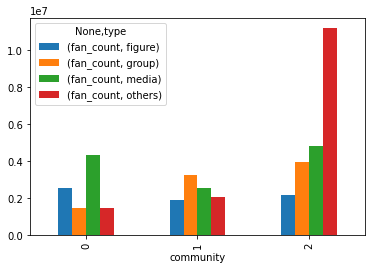

In [50]:
all_page_info.merge(top_3_com_df, left_on='page_id', right_index=True)[['page_name', 'community', 'type', 'fan_count']].groupby(by= ['community', 'type']).aggregate('mean').unstack(level=1).plot(kind='bar')

In [47]:
pd.read_csv('DATA/1000-page-and-politician-info.csv')

,page_id,page_name,type,type_sub,page_url,politician_name,party,chamber,state,district_rep,main_page,post_count
0,184179159166,Governor Robert Bentley,figure,politician,https://www.facebook.com/GovernorRobertBentley/,Robert J. Bentley,Republican,Governor,Alabama,Alabama,1.0,116.0
1,50850514797,Senator Richard Shelby,figure,politician,https://www.facebook.com/RichardShelby/,Richard Shelby,Republican,Senate,Alabama,Alabama,1.0,100.0
2,119152728153461,Ron Crumpton for U.S. Senate,figure,politician,https://www.facebook.com/Crumpton2016/,Ron Crumpton,Democratic,Senate,Alabama,Alabama,1.0,1.0
3,1374832002773140,U.S. Representative Bradley Byrne,figure,politician,https://www.facebook.com/RepByrne/,Bradley Byrne,Republican,House,Alabama,Alabama 1,0.0,NaN
4,113184250589,Bradley Byrne,figure,politician,https://www.facebook.com/byrneforalabama/,Bradley Byrne,Republican,House,Alabama,Alabama 1,1.0,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2461,737151126362683,American Military News,media,website,https://www.facebook.com/AmericanMilitaryNews,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2462,747754388695524,Bernie Sanders' Revolution,group,NaN,https://www.facebook.com/747754388695524,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2463,6181619439,The Denver Post,media,newspaper,https://www.facebook.com/denverpost,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2464,6879409364,Boston.com,media,website,https://www.facebook.com/boston,NaN,NaN,NaN,NaN,NaN,NaN,NaN
